# Project to Test Correlation between Head Size and Brain Weight

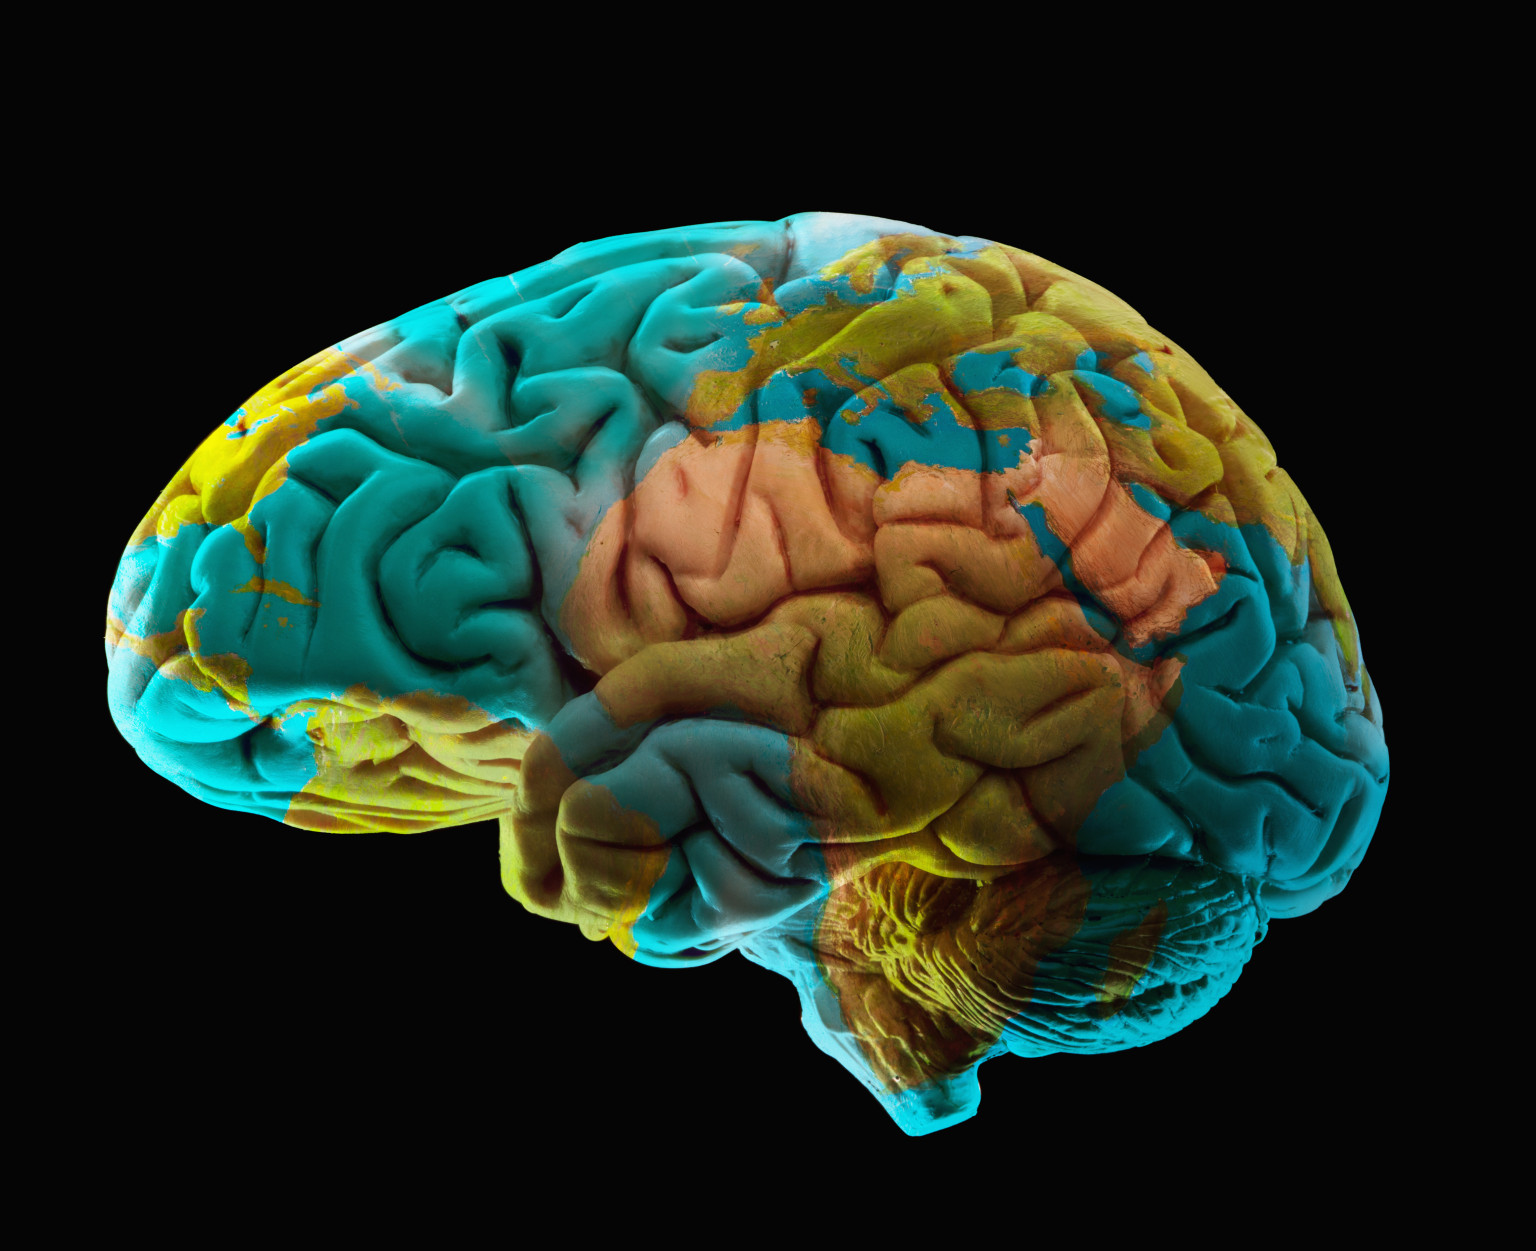

## Relationship between Head Size and Brain Weight

Across early childhood, brain volume and head circumference both increase, but from adolescence onward brain volume decreases while head circumference does not. Because of such changing relationships between brain volume and head circumference with age, a given head circumference was associated with a wide range of brain volumes.

# Step 1 : Importing various libraries

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.figsize']=(20.0,10.0)

# Step 2: Importing Data

In [2]:
data=pd.read_csv(r'C:\Users\Dell\Desktop\common dataset\headbrain.csv')
data

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590
...,...,...,...,...
232,2,2,3214,1110
233,2,2,3394,1215
234,2,2,3233,1104
235,2,2,3352,1170


In [3]:
data.shape

(237, 4)

# Step 3: Converting columns into array

In [4]:
#collecting x and y
X= data['Head Size(cm^3)'].values
Y= data['Brain Weight(grams)'].values

# Step 4: Calculating Y- Intercept(C) and Slope(m)

In [5]:
#Mean x and y
mean_x =np.mean(X)
mean_y =np.mean(Y)

# total number of values
n =len(X)

#using the formula to calculate m(slope) and c(y-intercept)
numer = 0
denom = 0
for i in range(n):
    numer += (X[i] - mean_x) * (Y[i] - mean_y)
    denom += (X[i] - mean_x) ** 2
b1 = numer / denom
b0= mean_y - (b1* mean_x)

#print coefficients
print(b1,b0)

0.26342933948939945 325.57342104944223


# Step 5: Plotting Regression Line and Values

A regression line is simply a single line that best fits the data (in terms of having the smallest overall distance from the line to the points). Statisticians call this technique for finding the best-fitting line a simple linear regression analysis using the least squares method.

The formula for the best-fitting line (or regression line) is y = mx + b, where m is the slope of the line and b is the y-intercept.

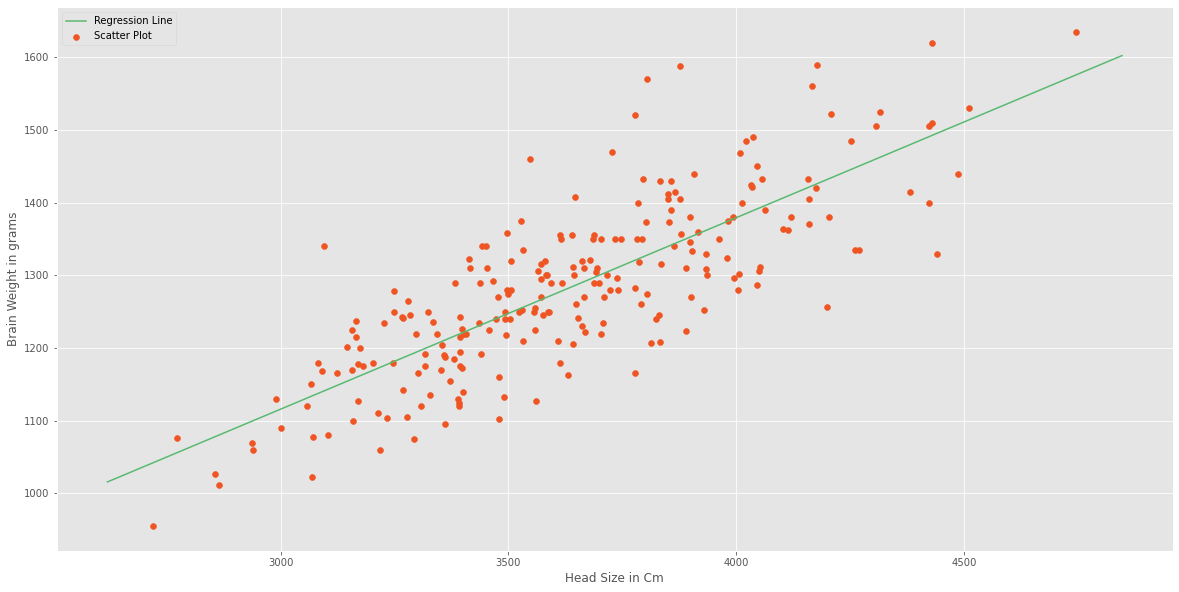

In [6]:
# plotting values and regression line
max_x = np.max(X) + 100
min_x = np.min(X) - 100

# calculating line values x and y
x = np.linspace(min_x, max_x, 1000)
y = b0 + b1 * x

# plotting line
plt.plot(x, y, color='#58b970', label='Regression Line')


# plotting scatter points
plt.scatter(X, Y, c='#ef5423' ,label='Scatter Plot')



plt.xlabel('Head Size in Cm')
plt.ylabel('Brain Weight in grams')
plt.legend()
plt.show()



# Step 6: Calculating R-Squared value manually

### What is R-Squared?

R-Squared (R² or the coefficient of determination) is a statistical measure in a regression model that determines the proportion of variance in the dependent variable that can be explained by the independent variable. In other words, r-squared shows how well the data fit the regression model (the goodness of fit)

In [7]:
# Calculating R-Squared Value
ss_t = 0
ss_r = 0
for i in range(n):
    y_pred = b0 + b1 * X[i]
    ss_t +=(Y[i] - mean_y) ** 2
    ss_r += (Y[i] - y_pred) ** 2
r2 = 1 - (ss_r/ss_t)
print(r2)

0.6393117199570003


    ### Insight - 63.93 percentage of data are explained by the regression line.

### What is the acceptable r-squared value?

It is difficult to provide rules of thumb regarding what R2 is appropriate, as this varies from research area to research area.
A high R-square of above 60%(0.60) is required for studies in the 'pure science' field because the behaviour of molecules and/or particles can be reasonably predicted to some degree of accuracy in science research; while an R-square as low as 10% is generally accepted for studies in the field of arts, humanities and social sciences because human behaviour cannot be accurately predicted, therefore, a low R-square is often not a problem in studies in the arts, humanities and social science field. However, that should not be an excuse for not improving the R-square value if it can be improved

# Step 7: Calculating R-Squared Value by using scikit learn library

In [8]:
# Scikit learn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# cannot use Rank 1 matrix in scikit learn
X = X.reshape((n, 1))

# Creating Model
reg = LinearRegression()

# Fitting training data
reg = reg.fit(X,Y)

# Y Prediction
Y_pred = reg.predict(X)

# Calculating R2 Score
r2_score = reg.score(X,Y)

print(r2_score)


0.639311719957


    ## Insight - 63.93 percentages of data  fit the regression model. That is 63.69% of data tells that there is a relationship between head size and brain weight

# The End